In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.data import Dataset
import os
import matplotlib.pyplot as plt

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2025-02-16 14:40:54.672283: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-16 14:40:54.828966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739688054.894935    1135 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739688054.913061    1135 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-16 14:40:55.058096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:

# # load the preprocessed data of training
# x_train = np.load("../data/numpy/X_train.npy")
# y_train = np.load("../data/numpy/Y_train.npy")


In [ ]:
# # load the preprocessed data of test
# x_test = np.load("../data/numpy/X_test.npy")
# y_test = np.load("../data/numpy/Y_test.npy")


In [ ]:

# print(y_train.shape)
# print(x_train.shape)


(8005,)
(8005, 150, 150, 3)


In [ ]:
# # turn into tensorflow data
# train_dataset = Dataset.from_tensor_slices((x_train, y_train)).batch(16)
# test_dataset = Dataset.from_tensor_slices((x_test, y_test)).batch(16)

I0000 00:00:1739686921.069095    1097 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-02-16 14:22:08.824855: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


In [ ]:
# Dataset.save(train_dataset,'../data/tfdata/saved_training')
# Dataset.save(test_dataset,'../data/tfdata/saved_testing')


In [2]:
train_dataset = Dataset.load('../data/tfdata/saved_training')
test_dataset = Dataset.load('../data/tfdata/saved_testing')

I0000 00:00:1739688062.880635    1135 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:
# model architecture(?) structure(?) baw

# Enable memory fragmentation mitigation
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

# Use mixed precision
# https://keras.io/api/mixed_precision/
set_global_policy('mixed_float16')

# Clear GPU memory
tf.keras.backend.clear_session()

model = Sequential()

with tf.device('/GPU:0'):
    # model.add(Input(shape = (224,224,3)))
    model.add(Input(shape = (150,150,3)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32,(3,3),activation ='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32, (3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(32, activation='relu', kernel_regularizer=0.001))
    # model.add(Dense(32, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))


model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,183,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,257 (4.59 MB)

 Trainable params: 1,204,257 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# model training

model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(train_dataset,epochs=10,batch_size = 16,validation_data = test_dataset, verbose = 1)
# history = model.fit(xx,yy,epochs=2,batch_size = 5, verbose = 1)


_, accuracy = model.evaluate(test_dataset)
print("Accuracy: %.2f" % (accuracy*100)) 

Epoch 1/10


2025-02-16 14:51:07.776970: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.675262759s
Trying algorithm eng48{k0=9,k2=1,k5=2,k14=5} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,74,74]{3,2,1,0}, f32[16,32,72,72]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...


501/501 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5182 - loss: 0.7063 - val_accuracy: 0.5635 - val_loss: 0.6784
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5846 - loss: 0.6724 - val_accuracy: 0.6436 - val_loss: 0.6343
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6750 - loss: 0.6086 - val_accuracy: 0.6634 - val_loss: 0.6041
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7408 - loss: 0.5198 - val_accuracy: 0.7049 - val_loss: 0.5878
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8042 - loss: 0.4200 - val_accuracy: 0.7049 - val_loss: 0.6469
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8489 - loss: 0.3236 - val_accuracy: 0.6935 - val_loss: 0.7580
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8959 - loss: 0.2400 - val_accuracy: 0.6757 - val_loss: 0.9738
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9242 - loss: 0.1846 - val_accuracy: 0.6

Text(0.5, 1.0, 'Accuracy')

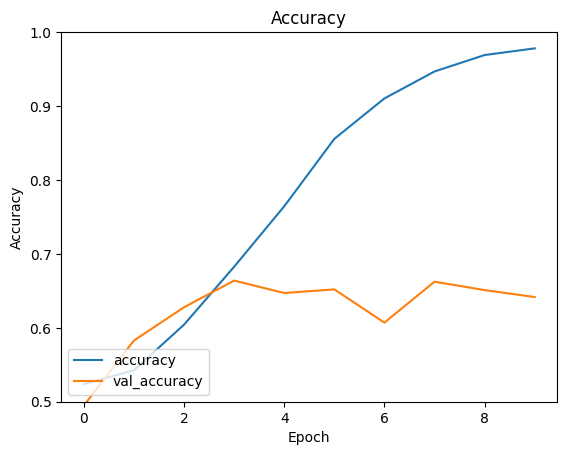

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')   
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.title("Accuracy")
# test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Text(0.5, 1.0, 'Loss')

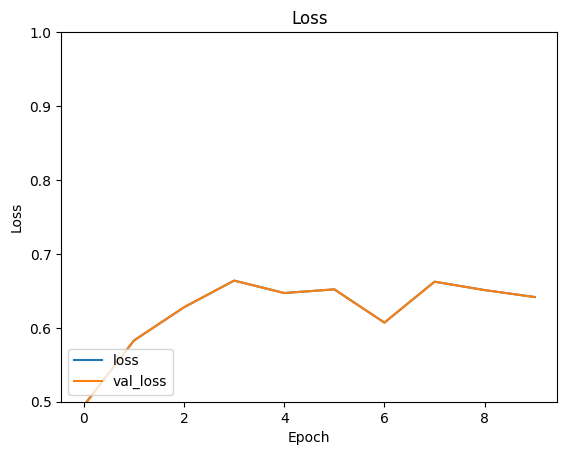

In [10]:

plt.plot(history.history['val_accuracy'], label = 'loss')   
plt.plot(history.history['val_accuracy'], label = 'val_loss')   
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.title("Loss")
# test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)